---
* **Titulo**: UOC | Algoritmo IA
* **Autor:** Miguel Ponce
* **Correo:** miguelalejoponce@uoc.edu
* **Fecha:** "Noviembre, 16 de 2021"
* **Salida**: ipynb, predicciones.csv
---
## Contexto: Preprocesamiento Datos

* **Contexto**: Reto a desarrollar
Desarrolla un algoritmo basado de machine learning en el que dado el input y output que se presentan en la sección de “Training “ permita calcular el output deseado a partir del input que aparece en la sección de “Test”.

## Origen del la fuente de datos


* Datasets
Training:

Input
[ -40, -10, 0, 8, 15, 22, 38 ]

Output
[-40, 14, 32, 46, 59, 72, 100 ]

Test:

Input
[5, 10, -7, 24, 89]

Output
Tiene que ser calculado por tu algoritmo en función del input presentado.


# Importar Liberías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

### Creacion de conjunto de datos

In [2]:
input = np.array([ -40, -10, 0, 8, 15, 22, 38 ])
output = np.array([-40, 14, 32, 46, 59, 72, 100 ])
df_data = pd.DataFrame({'input': input,'output':output})
df_data

,input,output
0,-40,-40
1,-10,14
2,0,32
3,8,46
4,15,59
5,22,72
6,38,100


## Graficamos los datos
En donde se observa que exist una aparente relacion lineal entre estos

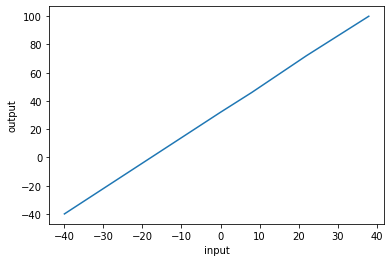

In [3]:
sns.lineplot(
    data=df_data, x="input", y="output",   markers=True, dashes=False
)

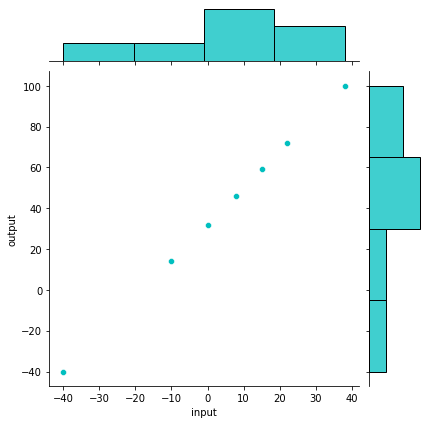

In [4]:
sns.jointplot(data=df_data, x="input", y="output",color='c')

## Creamos un modelo de regresion lineal

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(input.reshape(-1, 1), output)
reg.score(input.reshape(-1, 1), output)

0.9999637062454002

Calculos los coeficientes

In [6]:
print("Coef",reg.coef_)
print("Intercept",reg.intercept_)

Coef [1.79794911]
Intercept 31.952525636156476


## Calculamos las predicciones

In [7]:
predEY_reg_arb = reg.predict(input.reshape(-1, 1))

## Calculamos las métricas

In [8]:
print('MAE',mean_absolute_error(output,predEY_reg_arb))
print('MSE',mean_squared_error(output,predEY_reg_arb))
print('R2', r2_score(output,predEY_reg_arb))

MAE 0.1843633009603392
MSE 0.06304595518420045
R2 0.9999637062454002


### Predicciones finales

En este caso a pesar de que el modelo de ensamble mejor el eituqetamiento en una de las variables se oprtara por el modelo Randon Forest debido a que ofrecer una predicción balanacedada entre los diretentes tipos.

In [9]:
test_input = np.array([5, 10, -7, 24, 89])
predEY_test = reg.predict(test_input.reshape(-1, 1))

## El resultado de la evaluacion es

In [10]:
predEY_test

array([ 40.94227117,  49.93201671,  19.36688188,  75.10330422,
       191.9699962 ])

Visualizacion de los resultados

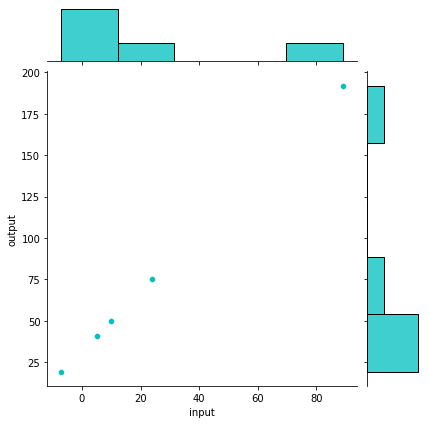

In [11]:
df_data_test = pd.DataFrame({'input': test_input,'output':predEY_test})
sns.jointplot(data=df_data_test, x="input", y="output",color='c')